In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.insert(1, '..\\Instruments\\network\\RS_Signal_Generator')
sys.path.insert(2, '..\\Instruments\\Acquisition_Card')
sys.path.insert(3, '..\\Instruments\\QuickSyn')
sys.path.insert(4, '..\\Instruments\\network\\AWG')

import Tools
import RS_SMA100B
import FSL_0010
from Card_Class import PXIe5170R
import AWG_Class
import Config as par

In [2]:
QSyn_port       = 'COM31'
SG_ip           = '192.168.40.15'                                  
Card_Name       = 'PXI1Slot3'

fsl             = FSL_0010.FSL10_synthesizer(device_address = QSyn_port)
# sGen            = RS_SMA100B.SMA100B(ip = SG_ip)
pxie            = PXIe5170R(resource_name = Card_Name)

FSL_0010:	Connection successful!
PXIe_5170R:    Connection successful!


FSL_0010: Frequency set to 3.5 GHz.
RF set to ON
Data Acquired.


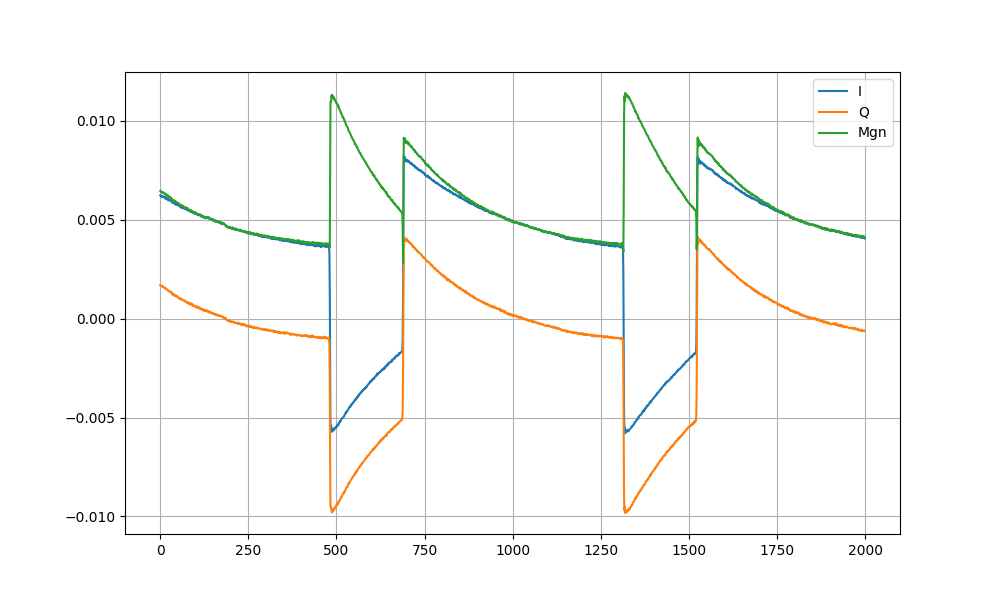

In [106]:
QSyn_freq = 3.5e9
sample_rate = 250e6
dict = {}

print(fsl.set_frequency(QSyn_freq))
print(fsl.set_output('ON'))

pxie.num_pts            = 2000
pxie.sample_rate        = 250e6 
pxie.num_records        = 1024
pxie.open(trigger_channel = 3)
wf_ch = pxie.acquisition()
# ch1 = np.array([np.array(wfm.samples.tolist()) for wfm in waveforms if wfm.channel == '0'])
# ch2 = np.array([np.array(wfm.samples.tolist()) for wfm in waveforms if wfm.channel == '1'])
print('Data Acquired.')
dict['LO'] = QSyn_freq
dict['I'] = np.mean(wf_ch['CH1'],axis=0)#np.array(waveforms[1].samples.tolist())
dict['Q'] = np.mean(wf_ch['CH0'],axis=0)#np.array(waveforms[0].samples.tolist())
plt.figure(figsize=(10,6))
plt.grid()

plt.plot(dict['I'], label = 'I')
plt.plot(dict['Q'], label = 'Q')
plt.plot(np.sqrt(dict['I']**2+dict['Q']**2), label = 'Mgn')
plt.legend()
plt.show()

Tools.save_dict_to_hdf5(dict, 'senza_cavità.h5')

In [ ]:
# Quick Syn
LO =  5e9
fsl_freq = round(LO, 1)
 

# MR GEN
dwc_f = 10e6                                                        # Down conversion frequency
step = 10e6
n = 20                                                              # number of steps


# PXIE
sample_rate     = 250e6                                             # Maximum Value: 250.0e6
num_pts         = int(sample_rate * pulse_period)                   # min 5ns                             
channels = {'I'			: 0, 
			'Q'			: 1,
			'trigger'	: 3}